In [2]:
import warnings
warnings.filterwarnings('ignore')
import joblib
from utils import *

In [3]:
if __name__ == '__main__':

    # Carregando dataset
    dataset =  pd.read_csv('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\datasets\\hypothyroid\\hypothyroid_dataset_clean.csv')
    dataset = dataset.drop_duplicates()
    output_label_dataset = dataset['binaryClass']
    dataset = dataset.drop(['binaryClass'], axis=1)

    # Balanceando os dados
    dataset_res, ouput_label = balance_dataset_smote(dataset, output_label_dataset, random_state=42, k_neighbors=5)
    
    # Dividindo os dados em 80% para treino e 20% para teste
    input_train, input_test, output_train, output_test = slipt_and_standardize_dataset(dataset=dataset_res, output_label=ouput_label)

# Modelos 

- Decision Tree Classifier
- Extra Trees Classifier
- Gradient Boosting Classifier
- Light Gradient Boosting Machine
- Random Forest Classifier
- Extreme Gradient Boosting

In [4]:
model_decisionTree = joblib.load('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\models_file\\DecisionTree.sav')
model_extraTrees = joblib.load('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\models_file\\ExtraTrees.sav')
model_gradientBoost = joblib.load('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\models_file\\GradientBoost.sav')
model_lightGBM = joblib.load('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\models_file\\LightGBM.sav')
model_randomForest = joblib.load('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\models_file\\RandomCV.sav')
model_XGBoost = joblib.load('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\models_file\\XGBoostClassifier.sav')

In [5]:
output_model_decisionTree = model_decisionTree.predict(input_test)
output_model_extraTrees = model_extraTrees.predict(input_test)
output_model_gradientBoost = model_gradientBoost.predict(input_test)
output_model_lightGBM = model_lightGBM.predict(input_test)
output_model_randomForest = model_randomForest.predict(input_test)
output_model_XGBoost = model_XGBoost.predict(input_test)

# Métricas para o modelo Decision Tree

In [6]:
accuracy(output_test, output_model_decisionTree)
precision(output_test, output_model_decisionTree)
recall(output_test, output_model_decisionTree)
f1(output_test, output_model_decisionTree)


A acurácia é de:  0.9901140684410646
A precisão é de:  0.9969183359013868
A pontuação de recall é de:  0.9832826747720365
A pontuação de F1 é de:  0.9900535577658761


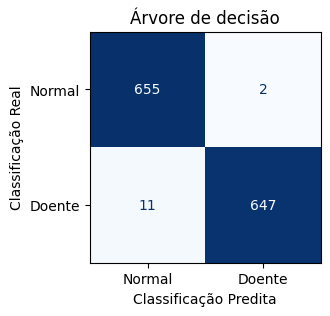

In [7]:
fig = plot_confusion_matrix(output_test, output_model_decisionTree, model=model_decisionTree, title='Árvore de decisão')
#salva figura
# fig.figure_.savefig('confusion_matrix_decision_tree.png', dpi=300, bbox_inches='tight')

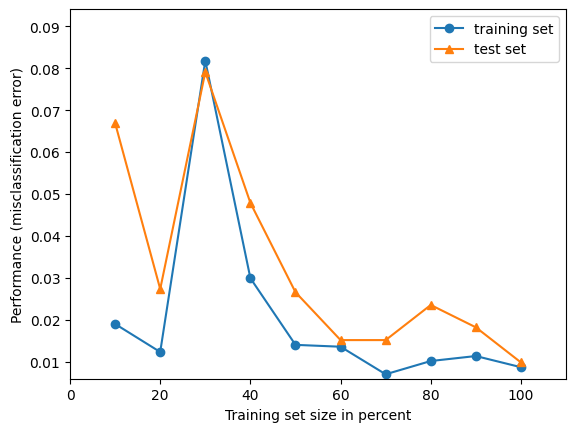

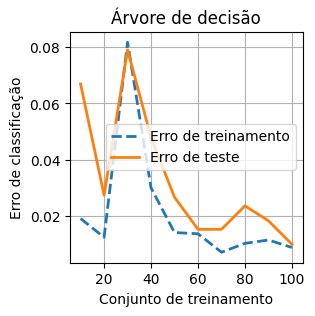

In [8]:
fig = miss_classification(input_train, output_train, input_test, output_test, model_decisionTree, title='Árvore de decisão')
# fig.savefig('error_decision_tree.png', dpi=300, bbox_inches='tight')

# Métricas para o modelo Extra Trees Classifier

In [9]:
accuracy(output_test, output_model_extraTrees)
precision(output_test, output_model_extraTrees)
recall(output_test, output_model_extraTrees)
f1(output_test, output_model_extraTrees)


A acurácia é de:  0.9916349809885932
A precisão é de:  1.0
A pontuação de recall é de:  0.9832826747720365
A pontuação de F1 é de:  0.9915708812260536


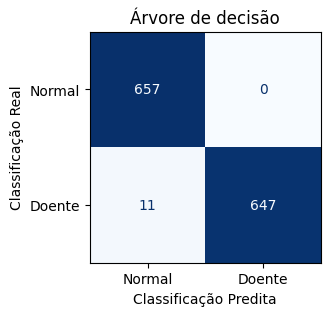

In [10]:
fig = plot_confusion_matrix(output_test, output_model_extraTrees, model=model_extraTrees, title='Árvore de decisão')
#salva figura
# fig.figure_.savefig('confusion_matrix_decision_tree.png', dpi=300, bbox_inches='tight')

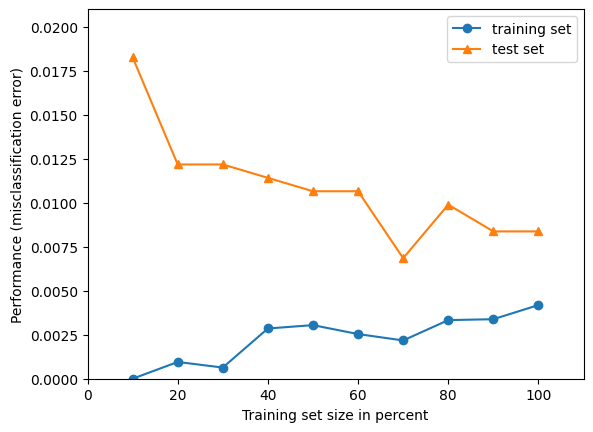

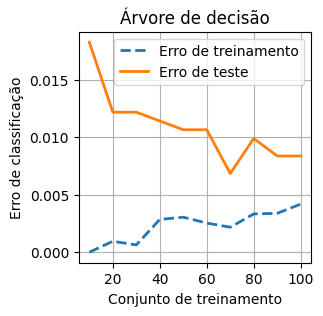

In [11]:
fig = miss_classification(input_train, output_train, input_test, output_test, model_extraTrees, title='Árvore de decisão')
# fig.savefig('error_decision_tree.png', dpi=300, bbox_inches='tight')

# Métricas para o modelo Gradient Boosting Classifier

In [12]:
accuracy(output_test, output_model_gradientBoost)
precision(output_test, output_model_gradientBoost)
recall(output_test, output_model_gradientBoost)
f1(output_test, output_model_gradientBoost)


A acurácia é de:  0.9946768060836502
A precisão é de:  1.0
A pontuação de recall é de:  0.9893617021276596
A pontuação de F1 é de:  0.9946524064171123


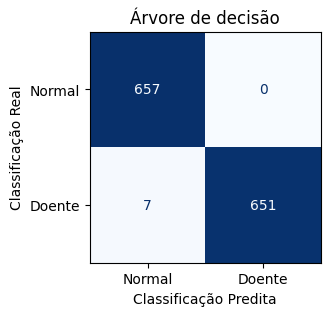

In [13]:
fig = plot_confusion_matrix(output_test, output_model_gradientBoost, model=model_gradientBoost, title='Árvore de decisão')
#salva figura
# fig.figure_.savefig('confusion_matrix_decision_tree.png', dpi=300, bbox_inches='tight')

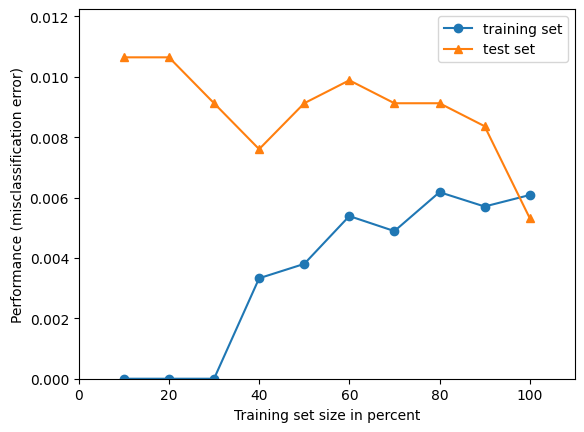

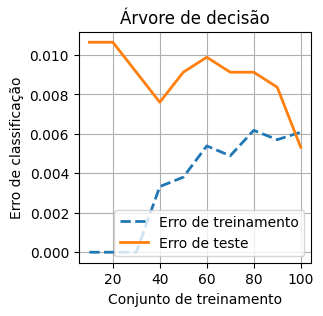

In [14]:
fig = miss_classification(input_train, output_train, input_test, output_test, model_gradientBoost, title='Árvore de decisão')
# fig.savefig('error_decision_tree.png', dpi=300, bbox_inches='tight')

# Métricas para o modelo Light Gradient Boosting Machine

In [15]:
accuracy(output_test, output_model_lightGBM)
precision(output_test, output_model_lightGBM)
recall(output_test, output_model_lightGBM)
f1(output_test, output_model_lightGBM)


A acurácia é de:  0.9916349809885932
A precisão é de:  0.9938931297709923
A pontuação de recall é de:  0.9893617021276596
A pontuação de F1 é de:  0.9916222391469917


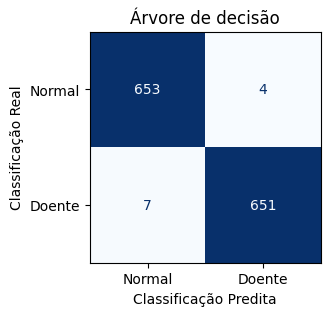

In [16]:
fig = plot_confusion_matrix(output_test, output_model_lightGBM, model=model_lightGBM, title='Árvore de decisão')
#salva figura
# fig.figure_.savefig('confusion_matrix_decision_tree.png', dpi=300, bbox_inches='tight')

[LightGBM] [Info] Number of positive: 262, number of negative: 263
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 525, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499048 -> initscore=-0.003810
[LightGBM] [Info] Start training from score -0.003810
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 547, number of negative: 504
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the 

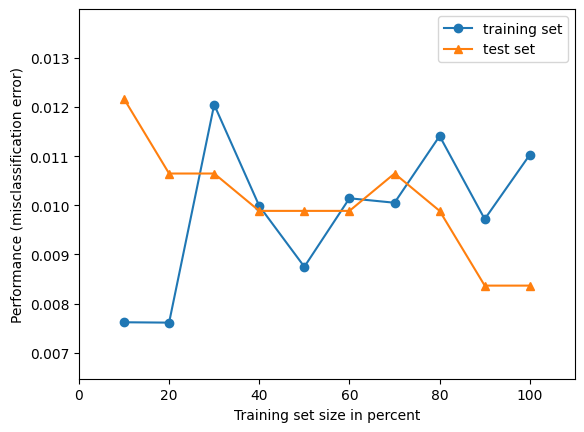

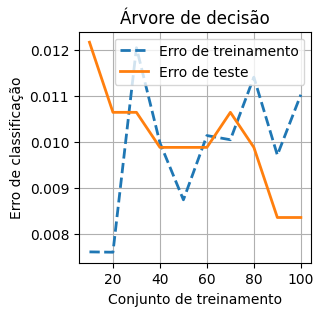

In [17]:
fig = miss_classification(input_train, output_train, input_test, output_test, model_lightGBM, title='Árvore de decisão')
# fig.savefig('error_decision_tree.png', dpi=300, bbox_inches='tight')

# Métricas para o modelo Random Forest Classifier

In [18]:
accuracy(output_test, output_model_randomForest)
precision(output_test, output_model_randomForest)
recall(output_test, output_model_randomForest)
f1(output_test, output_model_randomForest)


A acurácia é de:  0.9923954372623575
A precisão é de:  0.9969325153374233
A pontuação de recall é de:  0.9878419452887538
A pontuação de F1 é de:  0.9923664122137404


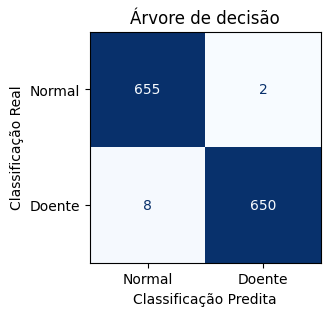

In [19]:
fig = plot_confusion_matrix(output_test, output_model_randomForest, model=model_randomForest, title='Árvore de decisão')
#salva figura
# fig.figure_.savefig('confusion_matrix_decision_tree.png', dpi=300, bbox_inches='tight')

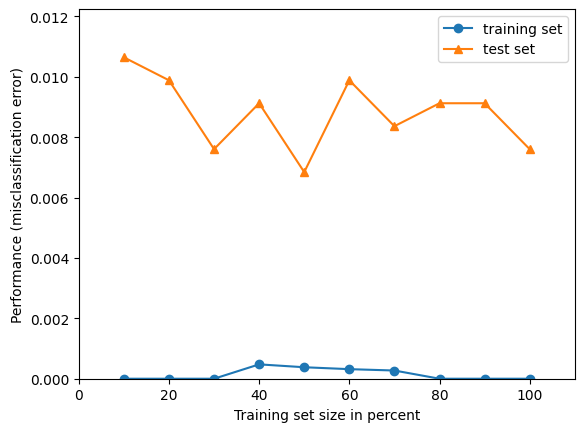

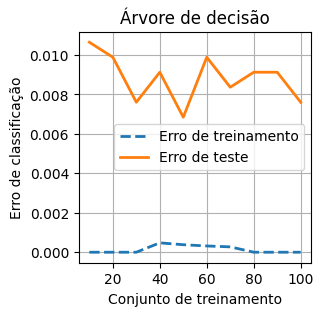

In [20]:
fig = miss_classification(input_train, output_train, input_test, output_test, model_randomForest, title='Árvore de decisão')
# fig.savefig('error_decision_tree.png', dpi=300, bbox_inches='tight')

# Métricas para o modelo Extreme Gradient Boosting

In [21]:
accuracy(output_test, output_model_XGBoost)
precision(output_test, output_model_XGBoost)
recall(output_test, output_model_XGBoost)
f1(output_test, output_model_XGBoost)


A acurácia é de:  0.990874524714829
A precisão é de:  0.9969230769230769
A pontuação de recall é de:  0.9848024316109423
A pontuação de F1 é de:  0.9908256880733944


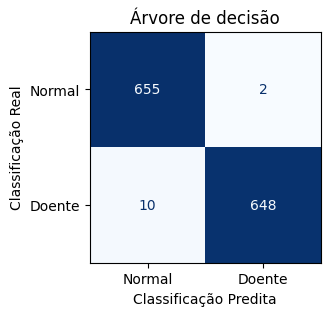

In [22]:
fig = plot_confusion_matrix(output_test, output_model_XGBoost, model=model_XGBoost, title='Árvore de decisão')
#salva figura
# fig.figure_.savefig('confusion_matrix_decision_tree.png', dpi=300, bbox_inches='tight')

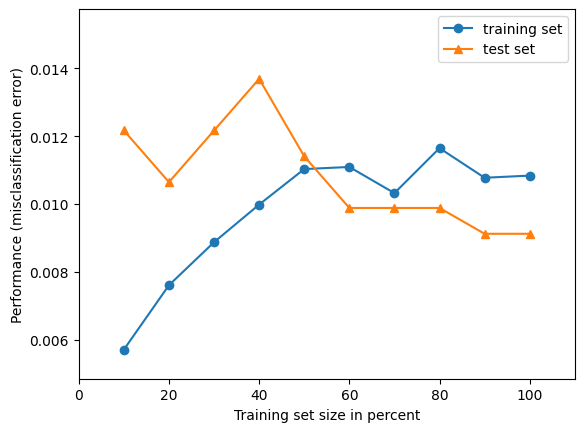

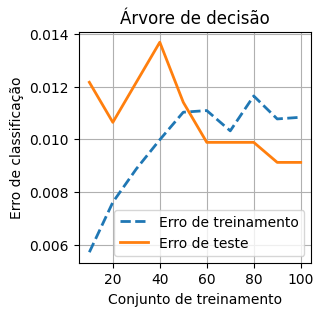

In [23]:
fig = miss_classification(input_train, output_train, input_test, output_test, model_XGBoost, title='Árvore de decisão')
# fig.savefig('error_decision_tree.png', dpi=300, bbox_inches='tight')

In [24]:
if __name__ == '__main__':

    # Carregando dataset
    dataset =  pd.read_csv('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\datasets\\hypothyroid\\hypothyroid_dataset_clean.csv')
    dataset = dataset.drop_duplicates()
    output_label_dataset = dataset['binaryClass']
    dataset = dataset.drop(['binaryClass'], axis=1)

    # Balanceando os dados
    dataset_res, ouput_label = balance_dataset_smote(dataset, output_label_dataset, random_state=42, k_neighbors=5)
    
    # Dividindo os dados em 80% para treino e 20% para teste
    input_train, input_test, output_train, output_test = slipt_and_standardize_dataset(dataset=dataset_res, output_label=ouput_label)

# Modelos 

- Decision Tree Classifier
- Extra Trees Classifier
- Gradient Boosting Classifier
- Light Gradient Boosting Machine
- Random Forest Classifier
- Extreme Gradient Boosting

In [25]:
model_decisionTree = joblib.load('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\models_file\\DecisionTree.sav')
model_extraTrees = joblib.load('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\models_file\\ExtraTrees.sav')
model_gradientBoost = joblib.load('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\models_file\\GradientBoost.sav')
model_lightGBM = joblib.load('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\models_file\\LightGBM.sav')
model_randomForest = joblib.load('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\models_file\\RandomCV.sav')
model_XGBoost = joblib.load('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\models_file\\XGBoostClassifier.sav')

In [26]:
output_model_decisionTree = model_decisionTree.predict(input_test)
output_model_extraTrees = model_extraTrees.predict(input_test)
output_model_gradientBoost = model_gradientBoost.predict(input_test)
output_model_lightGBM = model_lightGBM.predict(input_test)
output_model_randomForest = model_randomForest.predict(input_test)
output_model_XGBoost = model_XGBoost.predict(input_test)

# Métricas para o modelo Decision Tree

In [27]:
accuracy(output_test, output_model_decisionTree)
precision(output_test, output_model_decisionTree)
recall(output_test, output_model_decisionTree)
f1(output_test, output_model_decisionTree)


A acurácia é de:  0.9901140684410646
A precisão é de:  0.9969183359013868
A pontuação de recall é de:  0.9832826747720365
A pontuação de F1 é de:  0.9900535577658761


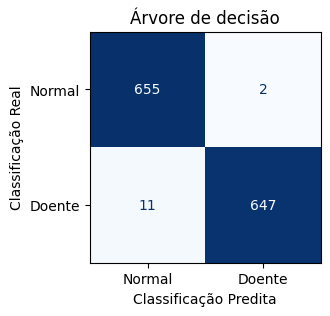

In [28]:
fig = plot_confusion_matrix(output_test, output_model_decisionTree, model=model_decisionTree, title='Árvore de decisão')
#salva figura
# fig.figure_.savefig('confusion_matrix_decision_tree.png', dpi=300, bbox_inches='tight')

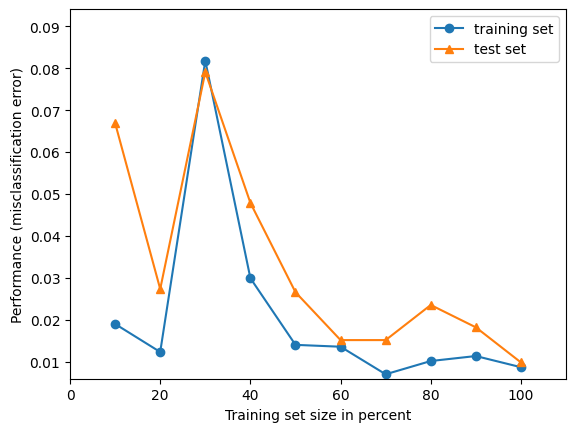

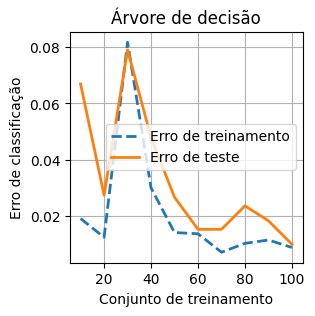

In [29]:
fig = miss_classification(input_train, output_train, input_test, output_test, model_decisionTree, title='Árvore de decisão')
# fig.savefig('error_decision_tree.png', dpi=300, bbox_inches='tight')